In [1]:
from sits_siam.utils import SitsDataset
from sits_siam.augment import RandomAddNoise, RandomTempSwapping, RandomTempShift, RandomTempRemoval, AddMissingMask, Pipeline

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

np.set_printoptions(precision=4, suppress=True)

In [7]:
df = pd.read_parquet("data/california_sits_bert_original.parquet")
df = df[df.label==5].reset_index(drop=True)

aug_dataset = SitsDataset(
    df,
    max_seq_len=45,
    transform=Pipeline([
        RandomAddNoise(0.02),
        RandomTempSwapping(max_distance=3),
        RandomTempShift(),
        RandomTempRemoval(),
        AddMissingMask(),
    ]),
)

common_dataset = SitsDataset(
    df,
    max_seq_len=45,
    transform=Pipeline([
        AddMissingMask(),
    ]),
)

In [10]:
def plot_single_sample_lines(sample, ax=None):
    x = sample['x']
    doy = sample['doy']
    mask = sample['mask']

    x = x[~mask]
    doy = doy[~mask]

    if ax is None:
        _, ax = plt.subplots(figsize=(10, 5))

    ax.plot(doy, x[:, 0], color='blue')
    ax.plot(doy, x[:, 1], color='green')
    ax.plot(doy, x[:, 2], color='red')
    ax.plot(doy, x[:, 3], color='orange')
    ax.plot(doy, x[:, 4], color='purple')
    ax.plot(doy, x[:, 5], color='brown')
    ax.plot(doy, x[:, 6], color='pink')
    ax.plot(doy, x[:, 7], color='gray')
    ax.plot(doy, x[:, 8], color='olive')
    ax.plot(doy, x[:, 9], color='cyan')

    ax.set_xlim(0, 366)
    ax.set_ylim(-0.1, 1)
    ax.grid(True)

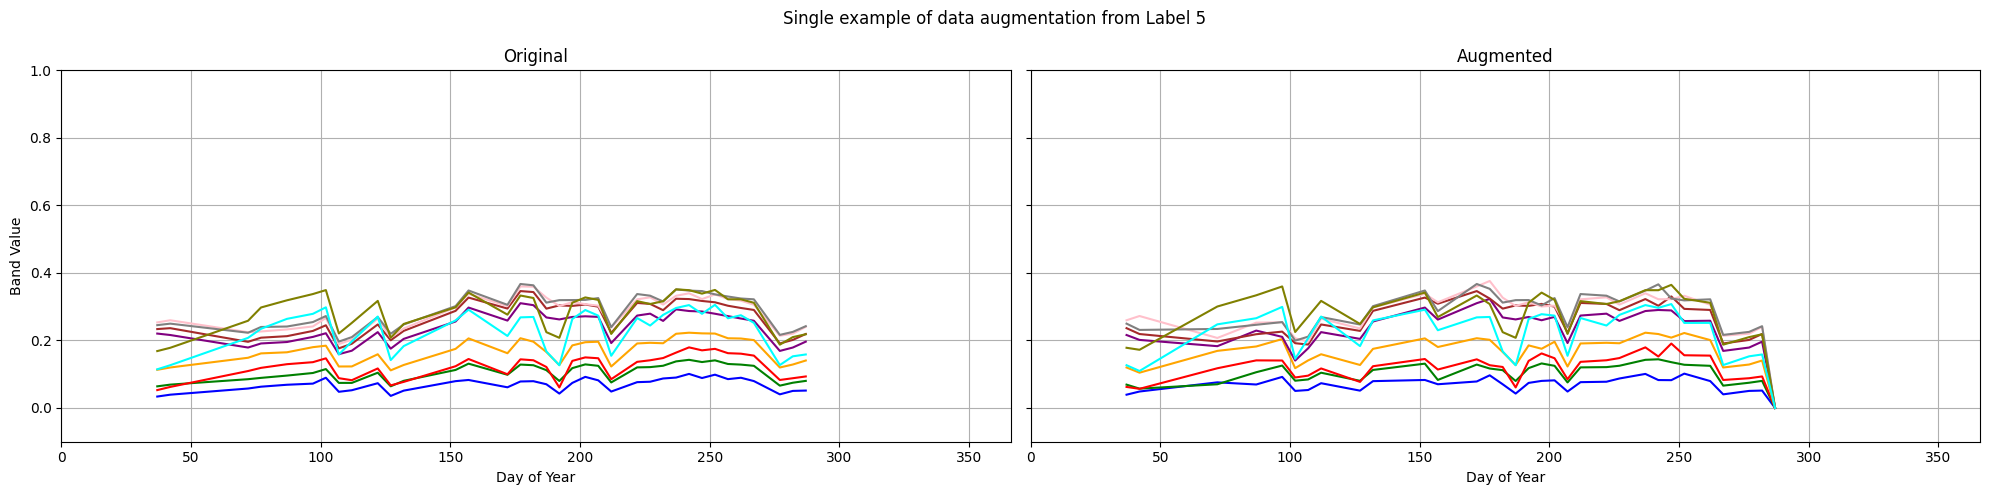

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(2*10, 5), sharex=True, sharey=True)

sample_id = 150

plot_single_sample_lines(common_dataset[sample_id], ax[0])
plot_single_sample_lines(aug_dataset[sample_id], ax[1])

fig.suptitle("Single example of data augmentation from Label " + str(common_dataset[sample_id]["y"]))

ax[0].set_title("Original")
ax[1].set_title("Augmented")

ax[0].set_xlabel("Day of Year")
ax[1].set_xlabel("Day of Year")
ax[0].set_ylabel("Band Value")

plt.tight_layout()
plt.savefig("figures/data_agumentation_single_example.pdf", bbox_inches='tight') 

In [78]:
def plot_lot_samples_fake_colors(dataset, n_samples=100, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 5))

    for y in range(n_samples):
        sample = dataset[y]

        doys = sample['doy']
        ys = np.repeat(y, sample['doy'].shape[0])
        colors = np.clip(sample['x'][:, [6,8,2]]*np.pi, 0, 1)

        mask = ~sample['mask']

        ax.scatter(doys[mask], ys[mask], c=colors[mask], alpha=0.5)
    
    # Set background color to grey
    ax.set_facecolor('grey')

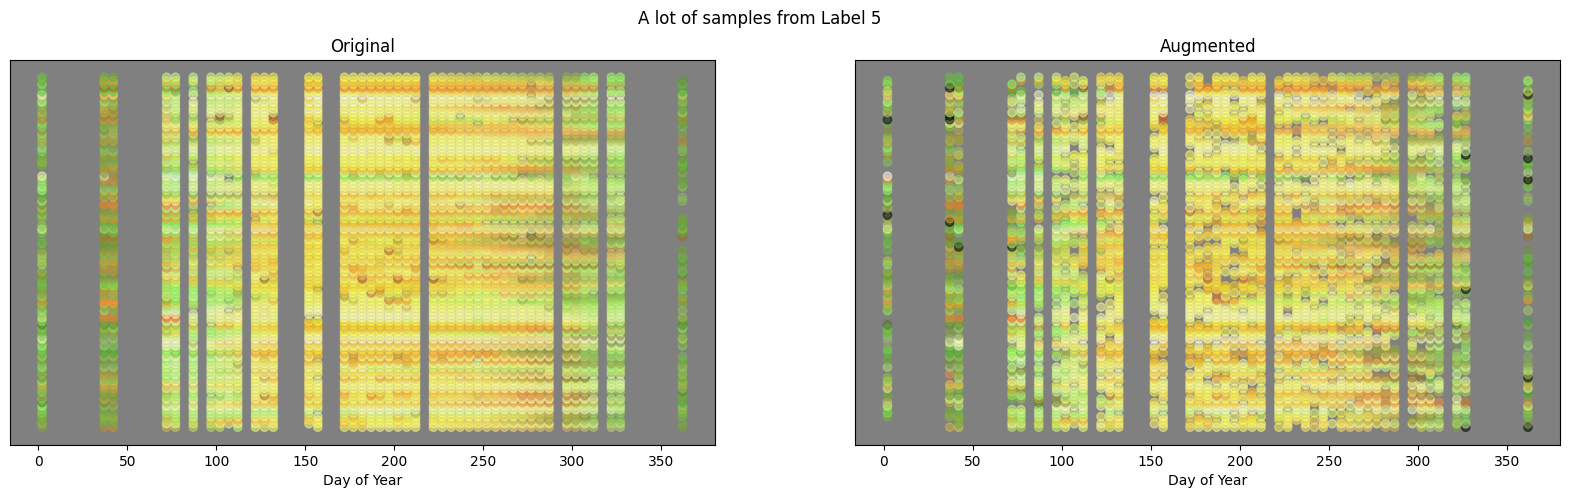

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(2*10, 5), sharex=True, sharey=True)

plot_lot_samples_fake_colors(common_dataset, ax=ax[0])
plot_lot_samples_fake_colors(aug_dataset, ax=ax[1])

fig.suptitle("A lot of samples from Label " + str(common_dataset[sample_id]["y"]))

ax[0].set_title("Original")
ax[1].set_title("Augmented")

ax[0].set_xlabel("Day of Year")
ax[1].set_xlabel("Day of Year")
ax[0].set_ylabel("")
ax[0].set_yticks([])


plt.savefig("figures/data_agumentation_a_lot_example.pdf", bbox_inches='tight') 

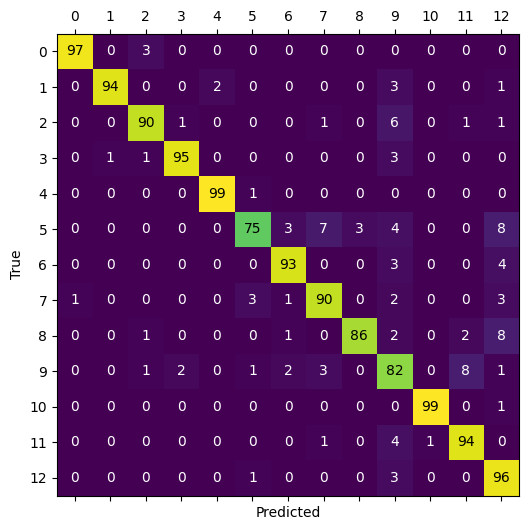

In [71]:
confusion_matrix = [[0.9700, 0.0000, 0.0300, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9400, 0.0000, 0.0000, 0.0200, 0.0000, 0.0000, 0.0000, 0.0000, 0.0300, 0.0000, 0.0000, 0.0100],
        [0.0000, 0.0000, 0.9000, 0.0100, 0.0000, 0.0000, 0.0000, 0.0100, 0.0000, 0.0600, 0.0000, 0.0100, 0.0100],
        [0.0000, 0.0100, 0.0100, 0.9500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0300, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.9900, 0.0100, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7500, 0.0300, 0.0700, 0.0300, 0.0400, 0.0000, 0.0000, 0.0800],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9300, 0.0000, 0.0000, 0.0300, 0.0000, 0.0000, 0.0400],
        [0.0100, 0.0000, 0.0000, 0.0000, 0.0000, 0.0300, 0.0100, 0.9000, 0.0000, 0.0200, 0.0000, 0.0000, 0.0300],
        [0.0000, 0.0000, 0.0100, 0.0000, 0.0000, 0.0000, 0.0100, 0.0000, 0.8600, 0.0200, 0.0000, 0.0200, 0.0800],
        [0.0000, 0.0000, 0.0100, 0.0200, 0.0000, 0.0100, 0.0200, 0.0300, 0.0000, 0.8200, 0.0000, 0.0800, 0.0100],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9900, 0.0000, 0.0100],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0100, 0.0000, 0.0400, 0.0100, 0.9400, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0100, 0.0000, 0.0000, 0.0000, 0.0300, 0.0000, 0.0000, 0.9600]]

confusion_matrix = np.round(np.array(confusion_matrix)*100).astype(int)


fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(confusion_matrix, cmap='viridis')


cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=confusion_matrix.min(), vmax=confusion_matrix.max())


for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        value = confusion_matrix[i][j]
        rgba = cmap(norm(value))
        r, g, b, _ = rgba
        luminance = 0.2126 * r + 0.7152 * g + 0.0722 * b
        text_color = 'white' if luminance < 0.5 else 'black'
        ax.text(j, i, f"{value}", ha='center', va='center', color=text_color)

ax.set_xticks(range(confusion_matrix.shape[1]))
ax.set_yticks(range(confusion_matrix.shape[0]))
ax.set_xticklabels(range(confusion_matrix.shape[1]))
ax.set_yticklabels(range(confusion_matrix.shape[0]))
ax.set_xlabel("Predicted")
ax.set_ylabel("True")

plt.savefig("figures/cm_sits_siam.pdf", bbox_inches='tight')

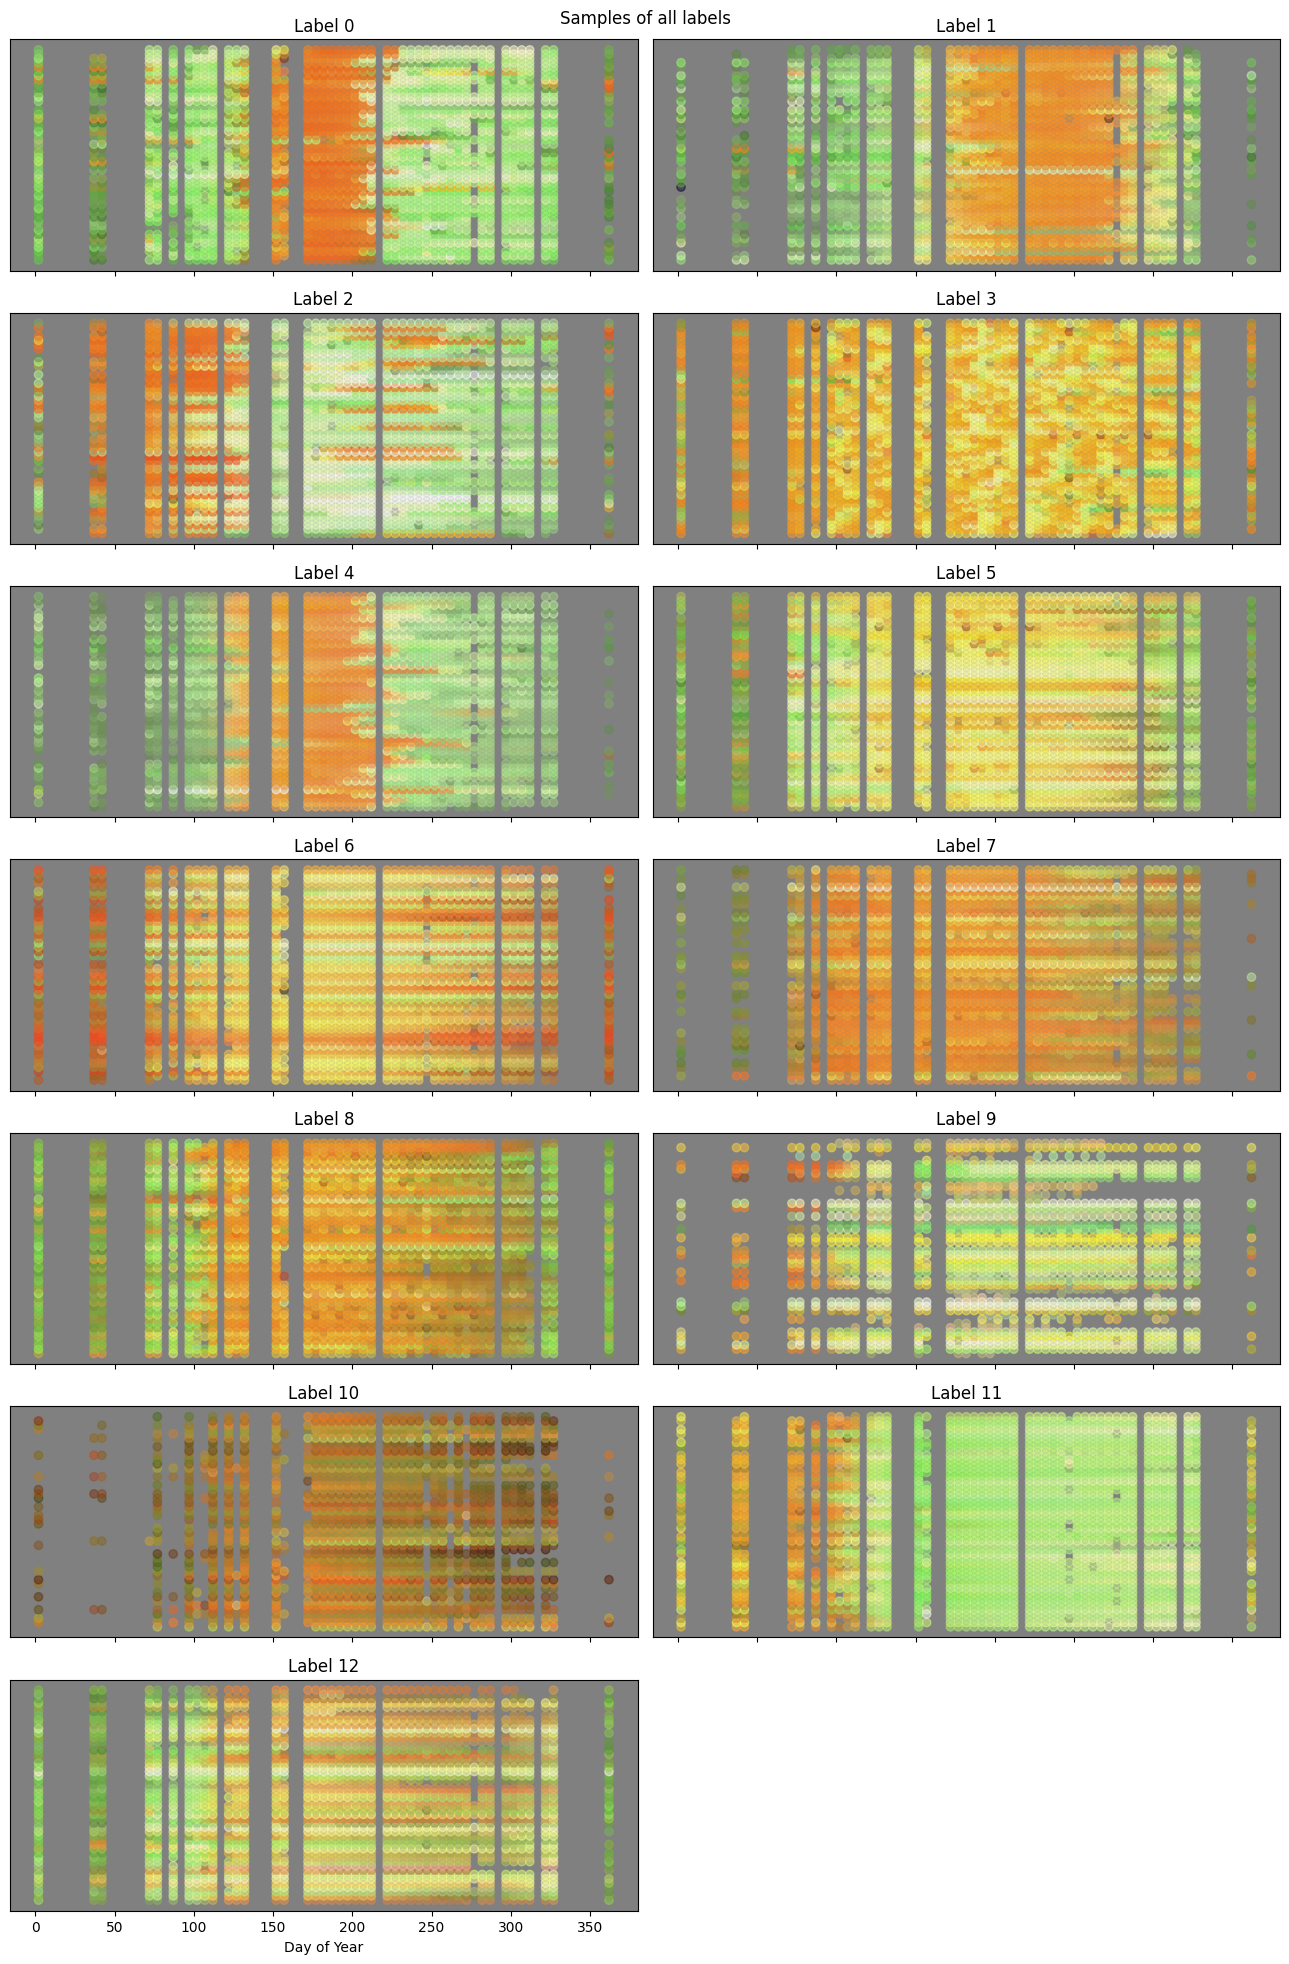

In [106]:
df = pd.read_parquet("data/california_sits_bert_original.parquet")

fig, ax = plt.subplots(7, 2, figsize=(13, 2*10), sharex=True, sharey=True)

for label_num in range(13):
    label_df = df[df.label==label_num].reset_index(drop=True)

    label_df = SitsDataset(
        label_df,
        max_seq_len=45,
        transform=Pipeline([
            AddMissingMask(),
        ]),
    )
    plot_lot_samples_fake_colors(label_df, ax=ax[label_num//2, label_num%2], n_samples=50)
    ax[label_num//2, label_num%2].set_title("Label " + str(label_num))

ax[0][0].set_yticks([])
ax[-1][0].set_xlabel("Day of Year")
ax[-1][1].set_xlabel("Day of Year")

# Remove the last subplot
fig.delaxes(ax[-1][-1])

fig.suptitle("Samples of all labels")

plt.tight_layout()
plt.savefig("figures/data_agumentation_all_labels.pdf", bbox_inches='tight')

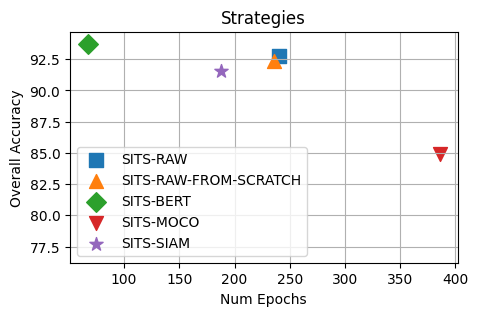

In [7]:
import matplotlib.pyplot as plt

# Data
strategies = ['SITS-RAW', 'SITS-RAW-FROM-SCRATCH', 'SITS-BERT', 'SITS-MOCO', 'SITS-SIAM']
epochs = [240, 236, 67, 386, 188]  # Assigning 0 Epoch to SITS-SHALLOW as no Epoch value is provided
OA = [ 92.76, 92.38, 93.7, 84.9, 91.53]
markers = ['s', '^', 'D', 'v', '*']  # Different markers for each strategy

# Plotting
plt.figure(figsize=(5, 3))

for i in range(len(strategies)):
    plt.scatter(epochs[i], OA[i], label=strategies[i], marker=markers[i], s=100)

# Set Y-axis starting point to 76.21
plt.ylim(76.21, max(OA) + 1)

plt.xlabel('Num Epochs')
plt.ylabel('Overall Accuracy')
plt.title('Strategies')
plt.legend()
plt.grid(True)
plt.savefig("figures/comparison_oa_vs_epochs.pdf", bbox_inches='tight')